In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = sns.load_dataset('titanic')

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [9]:
df['pclass'].value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [10]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [12]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

<Axes: >

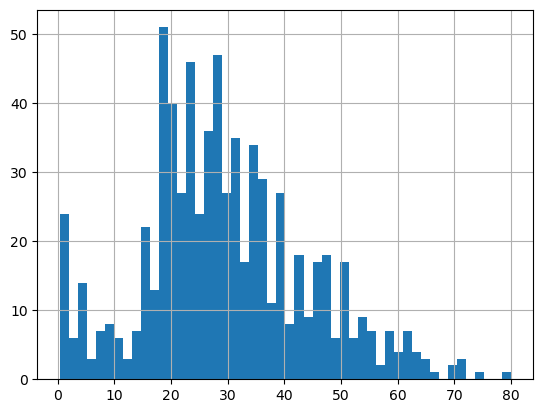

In [13]:
df['age'].hist(bins=50)

## data Preprocessing

In [14]:
subset = df[['pclass', 'sex', 'age', 'survived']].copy()
subset.dropna(inplace=True)

In [15]:
X = subset[['pclass', 'sex', 'age']].copy()

In [16]:
from sklearn import preprocessing

In [17]:
#lb = preprocessing.LabelBinarizier()
le = preprocessing.LabelEncoder()

In [18]:
X['sex'] = le.fit_transform(subset['sex'])

In [19]:
X.head()

,pclass,sex,age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [20]:
X.describe()

,pclass,sex,age
count,714.000000,714.000000,714.000000
mean,2.236695,0.634454,29.699118
std,0.838250,0.481921,14.526497
min,1.000000,0.000000,0.420000
25%,1.000000,0.000000,20.125000
50%,2.000000,1.000000,28.000000
75%,3.000000,1.000000,38.000000
max,3.000000,1.000000,80.000000


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  714 non-null    int64  
 1   sex     714 non-null    int32  
 2   age     714 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 19.5 KB


In [22]:
y = subset['survived'].copy()

In [23]:
y.value_counts()

survived
0    424
1    290
Name: count, dtype: int64

## Fit Model

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score 

In [27]:
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    
    if train:
        res= clf.predict(X_train)
        print("Train Result: \n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
        print("Confusion Matrix: \n{} \n".format(confusion_matrix(y_train, res)))
        print("ROC AUC : {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Score \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD \t\t {0:.4f}".format(np.std(res)))

    elif train==False:
        res_test= clf.predict(X_test)
        print("Test Result: \n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, res_test)))
        print("Confusion Matrix: \n{} \n".format(confusion_matrix(y_test, res_test)))
        print("ROC AUC : {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), lb.transform(res_test))))
    

## Decision Tree

In [28]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8938

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       289
           1       0.95      0.79      0.86       210

    accuracy                           0.89       499
   macro avg       0.91      0.88      0.89       499
weighted avg       0.90      0.89      0.89       499


Confusion Matrix: 
[[281   8]
 [ 45 165]] 

ROC AUC : 0.8790

Average Score 	 0.7777
Accuracy SD 		 0.0368

***********************************************

Test Result: 

accuracy score: 0.8372

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       135
           1       0.87      0.66      0.75        80

    accuracy                           0.84       215
   macro avg       0.85      0.80      0.82       215
weighted avg       0.84      0.84      0.83       215


Confusion Matrix: 
[[127   8]
 [ 27  53]] 

ROC AUC : 0.80

## Bagging

In [30]:
bag_clf = BaggingClassifier(estimator = clf, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [31]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [32]:
print_score(bag_clf, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(bag_clf, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8938

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       289
           1       0.93      0.80      0.86       210

    accuracy                           0.89       499
   macro avg       0.90      0.88      0.89       499
weighted avg       0.90      0.89      0.89       499


Confusion Matrix: 
[[277  12]
 [ 41 169]] 

ROC AUC : 0.8816

Average Score 	 0.7777
Accuracy SD 		 0.0455

***********************************************

Test Result: 

accuracy score: 0.8512

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       135
           1       0.89      0.69      0.77        80

    accuracy                           0.85       215
   macro avg       0.86      0.82      0.83       215
weighted avg       0.86      0.85      0.85       215


Confusion Matrix: 
[[128   7]
 [ 25  55]] 

ROC AUC : 0.81

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [35]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
print_score(rf_clf, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(rf_clf, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8938

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       289
           1       0.92      0.81      0.87       210

    accuracy                           0.89       499
   macro avg       0.90      0.88      0.89       499
weighted avg       0.90      0.89      0.89       499


Confusion Matrix: 
[[275  14]
 [ 39 171]] 

ROC AUC : 0.8829

Average Score 	 0.7677
Accuracy SD 		 0.0396

***********************************************

Test Result: 

accuracy score: 0.8326

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       135
           1       0.83      0.69      0.75        80

    accuracy                           0.83       215
   macro avg       0.83      0.80      0.81       215
weighted avg       0.83      0.83      0.83       215


Confusion Matrix: 
[[124  11]
 [ 25  55]] 

ROC AUC : 0.80

## Grid Search

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

In [39]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2,3,10],
               "min_samples_leaf": [1,3,10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [40]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')

In [41]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [42]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [43]:
grid_search.best_score_

0.8076767676767677

In [44]:
print_score(grid_search, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(grid_search, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8116

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       289
           1       0.93      0.60      0.73       210

    accuracy                           0.81       499
   macro avg       0.85      0.78      0.79       499
weighted avg       0.84      0.81      0.80       499


Confusion Matrix: 
[[280   9]
 [ 85 125]] 

ROC AUC : 0.7820

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totall

## Extra Trees

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
xt_clf = ExtraTreesClassifier(random_state=42, n_estimators=100)

In [47]:
xt_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [48]:
print_score(xt_clf, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(xt_clf, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8938

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       289
           1       0.95      0.79      0.86       210

    accuracy                           0.89       499
   macro avg       0.91      0.88      0.89       499
weighted avg       0.90      0.89      0.89       499


Confusion Matrix: 
[[281   8]
 [ 45 165]] 

ROC AUC : 0.8790

Average Score 	 0.7837
Accuracy SD 		 0.0413

***********************************************

Test Result: 

accuracy score: 0.8372

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       135
           1       0.85      0.69      0.76        80

    accuracy                           0.84       215
   macro avg       0.84      0.81      0.82       215
weighted avg       0.84      0.84      0.83       215


Confusion Matrix: 
[[125  10]
 [ 25  55]] 

ROC AUC : 0.80

## AdaBoost

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

In [51]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [52]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8216

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       289
           1       0.78      0.80      0.79       210

    accuracy                           0.82       499
   macro avg       0.82      0.82      0.82       499
weighted avg       0.82      0.82      0.82       499


Confusion Matrix: 
[[242  47]
 [ 42 168]] 

ROC AUC : 0.8187

Average Score 	 0.7696
Accuracy SD 		 0.0490

***********************************************

Test Result: 

accuracy score: 0.8093

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       135
           1       0.75      0.72      0.74        80

    accuracy                           0.81       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.81      0.81      0.81       215


Confusion Matrix: 
[[116  19]
 [ 22  58]] 

ROC AUC : 0.79

## AdaBoost with RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)

In [55]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [56]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(ada_clf, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8216

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.84      0.84       289
           1       0.78      0.80      0.79       210

    accuracy                           0.82       499
   macro avg       0.82      0.82      0.82       499
weighted avg       0.82      0.82      0.82       499


Confusion Matrix: 
[[242  47]
 [ 42 168]] 

ROC AUC : 0.8187

Average Score 	 0.7696
Accuracy SD 		 0.0490

***********************************************

Test Result: 

accuracy score: 0.8093

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       135
           1       0.75      0.72      0.74        80

    accuracy                           0.81       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.81      0.81      0.81       215


Confusion Matrix: 
[[116  19]
 [ 22  58]] 

ROC AUC : 0.79

## Gradient Boosting 

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbm_clf = GradientBoostingClassifier()

In [63]:
gbm_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [64]:
print_score(gbm_clf, X_train, X_test, y_train, y_test, train=True)
print("\n***********************************************\n")
print_score(gbm_clf, X_train, X_test, y_train, y_test, train=False)

Train Result: 

accuracy score: 0.8758

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       289
           1       0.92      0.77      0.84       210

    accuracy                           0.88       499
   macro avg       0.89      0.86      0.87       499
weighted avg       0.88      0.88      0.87       499


Confusion Matrix: 
[[275  14]
 [ 48 162]] 

ROC AUC : 0.8615

Average Score 	 0.7757
Accuracy SD 		 0.0440

***********************************************

Test Result: 

accuracy score: 0.8419

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       135
           1       0.86      0.69      0.76        80

    accuracy                           0.84       215
   macro avg       0.85      0.81      0.82       215
weighted avg       0.84      0.84      0.84       215


Confusion Matrix: 
[[126   9]
 [ 25  55]] 

ROC AUC : 0.81